# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [312]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [313]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X = X[shuffle]
Y = Y[shuffle]

print '>> data shape: ', X.shape
print '>> label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


>> data shape:  (70000, 784)
>> label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

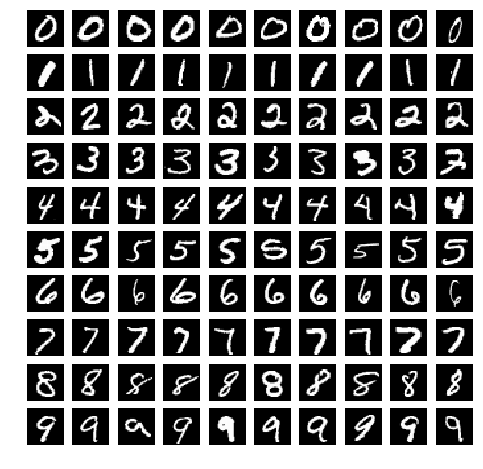

In [314]:
def P1(num_examples=10):

    ### STUDENT START ###
     
    digits_count = len(np.unique(mini_train_labels)) 
    digit_values = np.zeros((num_examples * digits_count, mini_train_data.shape[1]))
        
    for digit in range(digits_count):
        subset = mini_train_data [mini_train_labels == digit]  
        #pick a random array of digits to plot... 
        shuffle = np.random.permutation(np.arange(subset.shape[0]))
        digit_values[digit * num_examples : (digit + 1) * num_examples] = subset[shuffle][:num_examples]

    #plot all collected random digits.    
    plot(digit_values, digits_count, num_examples)

    
"""
Plots digits as images
args:
    @param data: the digits array
    @param rows_count: number of rows in the matrix.
    @param cols_count: number of coluns in the matrix.
"""
def plot(data, rows_count, cols_count):
    plt.figure(figsize = (8, 8))
    for i, img_values in enumerate(data):
        #reshape to 28x28
        img_values = img_values.reshape(28, 28)
        #add a subsplot for the current digit.
        plt.subplot(rows_count, cols_count, i+1)
        plt.axis('off')
        #now, show the image..
        plt.imshow(img_values, cmap='gray')

### STUDENT END ###
        
P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [315]:
def P2(k_values):

### STUDENT START ###

    for k in k_values:
        k_classifier = KNeighborsClassifier(k)
        #fit the classifier model using our mini train data and labels. 
        k_classifier.fit(mini_train_data, mini_train_labels)
        predicted_labels = k_classifier.predict(dev_data)
        print 'classification_report for k={}\n'.format(k), (classification_report(dev_labels, predicted_labels))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

classification_report for k=1
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        99
         1.0       0.89      1.00      0.94       105
         2.0       0.99      0.79      0.88       102
         3.0       0.77      0.87      0.82        86
         4.0       0.89      0.82      0.85       104
         5.0       0.93      0.84      0.88        91
         6.0       0.94      0.96      0.95        98
         7.0       0.89      0.92      0.90       113
         8.0       0.94      0.88      0.91        96
         9.0       0.78      0.82      0.80       106

   micro avg       0.89      0.89      0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

classification_report for k=3
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        99
         1.0       0.81      1.00      0.89       105
         2.0      

ANSWER: From the results of k=1, we can observe that is has a very good accuracy score of 89%. It is also notable that **(9.0)** is the most difficult digit, with the loswest f1-score of 80%

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [316]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    for size in train_sizes:
        #shuffle training data
        shuffle = np.random.permutation(np.arange(train_data.shape[0]))
        random_train_data = train_data[shuffle][:size]
        random_label_data = train_labels[shuffle][:size]
        
        #build new classifier model w/ k=1
        k_classifier = KNeighborsClassifier(1)
        
        #fit the classifier model using our mini train data and labels. 
        #start the timer. 
        start_time = time.time()
        k_classifier.fit(random_train_data, random_label_data)
        
        #calculate mean accuracy on the given test data and labels.
        accuracy = k_classifier.score(dev_data, dev_labels)
        
        #stop timer
        elapsed_time = time.time() - start_time

        print 'accuracy={} for train_size={}, elapsed_time={}'.format(accuracy, size, elapsed_time) 
        
        #add accuracy to a dictionary. key=size, val=accuray_val
        accuracies[size] = accuracy

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = {}
P3(train_sizes, accuracies)

accuracy=0.626 for train_size=100, elapsed_time=0.150165081024
accuracy=0.767 for train_size=200, elapsed_time=0.243133068085
accuracy=0.832 for train_size=400, elapsed_time=0.559043884277
accuracy=0.86 for train_size=800, elapsed_time=0.979245901108
accuracy=0.905 for train_size=1600, elapsed_time=2.05332279205
accuracy=0.927 for train_size=3200, elapsed_time=4.12821006775
accuracy=0.943 for train_size=6400, elapsed_time=8.33935379982
accuracy=0.958 for train_size=12800, elapsed_time=17.1092860699
accuracy=0.97 for train_size=25000, elapsed_time=34.6462779045


 From the above output, it is clear that there is a **positive** correlation between model accurcy and training data size. 

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [317]:
def P4(accuracies):

    ### STUDENT START ###
    target_size = 60000
       
    #reshape to 1D
    train_sizes_reshaped = np.array(accuracies.keys()).reshape(len(accuracies.keys()), 1)
    
    #Init and Fit linear regression model
    regression_model = LinearRegression()
    regression_model.fit(train_sizes_reshaped, accuracies.values())
    predicted_accuray = regression_model.predict(train_sizes_reshaped)
    print('predicted accuray for training_size={}'.format(predicted_accuray))
    
    #now run the prediction if train size is 60000
    predicted_accuray = regression_model.predict(np.array([60000]).reshape(1, -1))
    print('predicted accuray of 60000 training_size={}'.format(predicted_accuray))

### STUDENT END ###

P4(accuracies)

predicted accuray for training_size=[0.83311013 0.8459637  0.8210599  0.82186324 0.87167086 0.82346994
 1.02109372 0.92308518 0.82668334]
predicted accuray of 60000 training_size=[1.30226575]


ANSWER: The accuracy of training size of 60K is 1.214, which is illogical. Valid accuracy values should be between 0 and 1. Linear Regression is therefore not applicable for this test.

In [290]:
### TODO how to improve?

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

np.unique(mini_train_labels) [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Confusion matrix, without normalization
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


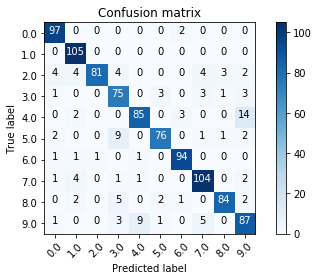

In [198]:
import itertools

def P5():

### STUDENT START ###
    #1-NN Classifier
    k_classifier = KNeighborsClassifier(1)
    #fit the classifier model using our mini train data and labels. 
    k_classifier.fit(mini_train_data, mini_train_labels)
    # Predict and return confusion matrix
    predictions = k_classifier.predict(dev_data)
    cm = confusion_matrix(dev_labels, predictions)
    print 'np.unique(mini_train_labels)', np.unique(mini_train_labels)
    plot_confusion_matrix(cm, np.unique(mini_train_labels))
    
### STUDENT END ###

P5()

'''
source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion
_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

'''
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

From the above matrix, we can observe that the pair (4, 9) are the most confused. Below are few examples:

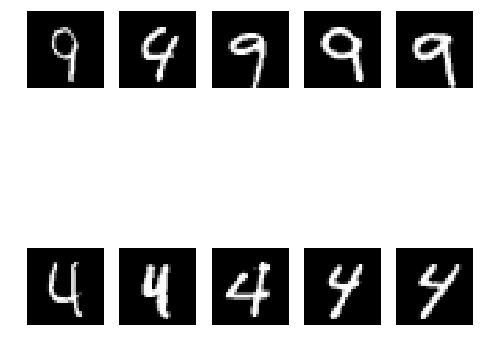

In [431]:
#build 
four_digits = dev_data[np.all([dev_labels == 4, predictions == 9], axis=0)]
nine_digits = dev_data[np.all([dev_labels == 9, predictions == 4], axis=0)]
confused_rows = np.zeros((10, mini_train_data.shape[1]))

#extract sample '4' digits where we predicted '9'
confused_rows[5:] = four_digits[:5]

#extract sample '9' where we prediced '4'
confused_rows[:5] = nine_digits[:5]

#now plot 
plot(confused_rows, 2, 5)

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [ ]:
def P6():
    
### STUDENT START ###
    
    train_data_blur = blur_data(train_data)
    test_data_blur = blur_data(test_data)
    dev_data_blur = blur_data(dev_data)

    # build model 1 with training data but not the dev data
    model_1 = KNeighborsClassifier(1)
    model_1.fit(train_data_blur, train_labels)
    score_1 = model_1.score(test_data_blur, test_labels)
    print 'model 1 score={}'.format(score_1)
   
    # build model 2 with the dev data but not the training data
    model_2 = KNeighborsClassifier(1)
    model_2.fit(train_set, train_set_labels)
    score_2 = model_2.score(dev_data_blur, test_labels)
    print 'model 2 score={}'.format(score_2)

    
    # build model 3 with both training and dev data
    model_3 = KNeighborsClassifier(1)
    model_3.fit(test_data_blur, train_set_labels)
    score_3 = model_3.score(test_data_blur, test_labels)
    print 'model 1 score={}'.format(score_3)

def blur_data(data):
    #TODO
    return data

### STUDENT END ###

P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [433]:
def P7():

### STUDENT START ###
    
    # BernoulliNB model
    bernoulli_model = BernoulliNB(binarize=True)
    bernoulli_model.fit(mini_train_data, mini_train_labels)
    #caclculate accuracy.. aka score
    bernoulli_score = bernoulli_model.score(dev_data, dev_labels)
    
    # prep data for multinominal dataset
    multi_train_data = perpMultiData(mini_train_data)
    multi_dev_data = perpMultiData(dev_data)
    
    # MultinomialNB model
    multinomial_model = MultinomialNB()
    multinomial_model.fit(multi_train_data, mini_train_labels) 
    #calculate accuray
    multinominal_score = multinomial_model.score(multi_dev_data, dev_labels)
    
    print 'BernoulliNB score={}'.format(bernoulli_score)
    print 'MultinomialNB score={}'.format(multinominal_score)
    
### STUDENT END ###

'''
Maps pixel values to 0, 1, or 2, representing white, grey, or black
args:
    @param data: data to be adjusted
'''
def perpMultiData(data):
    
    multi_data = np.zeros(data.shape)
    thresholds = [0.4, 0.6]
    
    for i, digit in enumerate(data):
        multi_data[i][digit < thresholds[0]] = 0
        multi_data[i][np.all([digit >= thresholds[0], digit < thresholds[1]], axis=0)] = 1
        multi_data[i][digit >= thresholds[1]] = 2
    
    return multi_data

P7()

BernoulliNB score=0.086
MultinomialNB score=0.799


ANSWER: As implied by the above results, the accuracy score of the multinormialNB was less than the accuracy score of bernoulliNB. With our dev data we were not only able to acheive better accuracy, but we were also prone to overfitting.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [306]:
def P8(alphas):

### STUDENT START ###
    bernoulli_model = BernoulliNB()
    grid_search = GridSearchCV(bernoulli_model, alphas)
    grid_search.fit(mini_train_data, mini_train_labels)
    
    return grid_search

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [307]:
print nb.best_params_

{'alpha': 0.1}


ANSWER: The best score is 0.1. For alpha=0, I expect a lesser accuracy percentage for the lack of smoothing. This can also be proven by running the following:

In [311]:
bernoulli_model = BernoulliNB()
alphas = {'alpha': [0.0]}
grid_search = GridSearchCV(bernoulli_model, alphas)
grid_search.fit(mini_train_data, mini_train_labels)

print grid_search.cv_results_

{'std_train_score': array([0.00224686]), 'rank_test_score': array([1], dtype=int32), 'mean_train_score': array([0.89049586]), 'split0_train_score': array([0.88821752]), 'std_test_score': array([0.03083557]), 'split1_train_score': array([0.89355322]), 'split0_test_score': array([0.84319527]), 'mean_test_score': array([0.803]), 'split2_train_score': array([0.88971684]), 'std_score_time': array([0.00010103]), 'params': [{'alpha': 0.0}], 'std_fit_time': array([0.00042521]), 'split2_test_score': array([0.79635258]), 'mean_score_time': array([0.002678]), 'mean_fit_time': array([0.00618235]), 'param_alpha': masked_array(data=[0.0],
             mask=[False],
       fill_value='?',
            dtype=object), 'split1_test_score': array([0.76876877])}


/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [340]:
from scipy.ndimage import gaussian_filter

def P9():

### STUDENT END ###
    gaussian_model = GaussianNB()
    gaussian_model.fit(train_data, train_labels)
    #now predict accuracy using our dev data.. 
    gaussian_score = gaussian_model.score(dev_data, dev_labels)
    print 'GuassianNB accuracy=', gaussian_score
    
    #Add a blur to the our training data. 
    gaussian_blurred_model = GaussianNB()
    gaussian_blurred_model.fit(gaussian_filter(train_data, 1), train_labels)
    gaussian_blurred_score = gaussian_blurred_model.score(dev_data, dev_labels)
    print 'GuassianNB with blurred data accuracy=', gaussian_blurred_score

### STUDENT END ###

gnb = P9()

GuassianNB accuracy= 0.571
GuassianNB with blurred data accuracy= 0.786


ANSWER: GaussianNB accuracy can be increased by adding a blur to the data, which raises the variability of the features.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

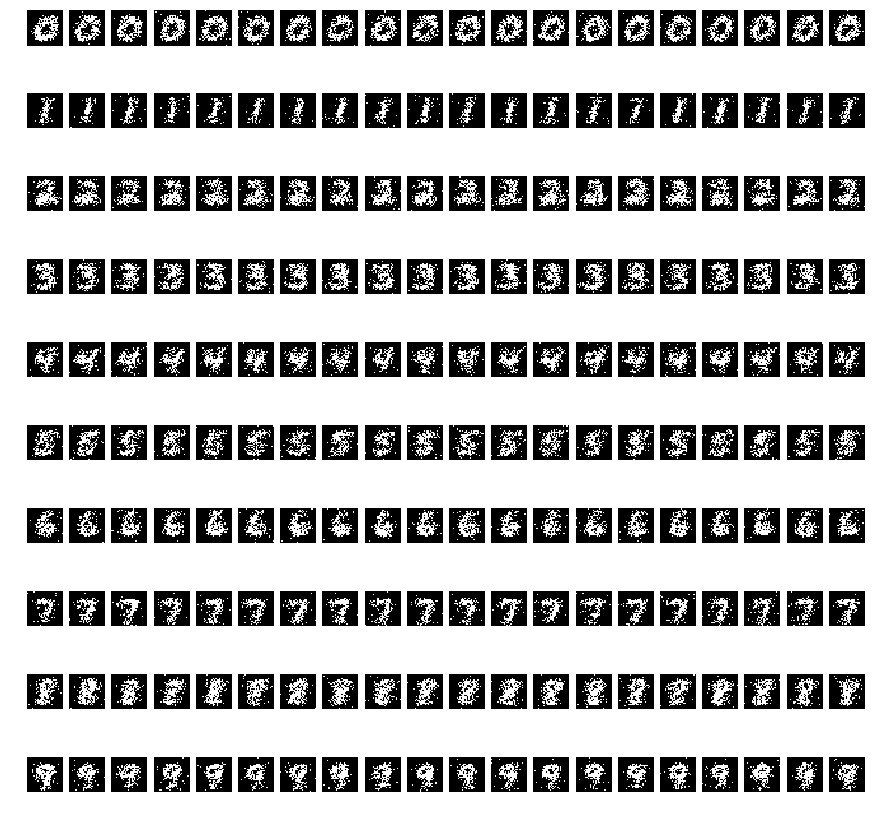

In [364]:
def P10(num_examples):

### STUDENT START ###
    bernoulli_model = BernoulliNB()
    bernoulli_model.fit(mini_train_data, mini_train_labels)
    
    # get the estimated probability of each pixel
    prob = np.exp(bernoulli_model.feature_log_prob_)
    
    plt.figure(figsize = (15, 15))
    
    for digit in range(10):
        for eg in range(num_examples):
            digit_to_plot = digit * num_examples + (eg + 1)
            
            # Generate a boolean vector according to the specified probabilities
            img_values = prob[digit] > np.random.rand(prob.shape[1])
            img_values = img_values.reshape(28, 28)
            
            # now lets subplot 
            plt.subplot(10, num_examples, digit_to_plot)
            plt.axis('off')
            plt.imshow(img_values, cmap='gray')
        
### STUDENT END ###

P10(20)

ANSWER: The generated digits are the average of the training data.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [425]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    bernoulli_model = BernoulliNB(1, 0.5)
    bernoulli_model.fit(mini_train_data, mini_train_labels)
    
    # estimate the classifier's accuracy
    predicted_class = bernoulli_model.predict(dev_data)

    # Predict probabilities and classes
    predicted_probs = bernoulli_model.predict_proba(dev_data)
    predicted_class = bernoulli_model.predict(dev_data)
    
    for i, predicted_label in enumerate(predicted_class):
        # find "maximum" predicted probability..
        max_prob = max(predicted_probs[i])
        
        # define bucket index with max prob by summing instannces of max_prob is greater than bucket
        bucket_index = sum(max_prob > buckets)
        
        # count correct predictions
        if (predicted_label == dev_labels[i]):
            correct[bucket_index] += 1
        
        total[bucket_index] += 1
    
    return (correct, total)
          
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)
    
for i in range(len(buckets)):
    accuracy = 0
    if total[i] > 0: 
        accuracy = 1.0 * correct[i] / total[i]
    #print 'accuracy', accuracy
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  35    accuracy = 0.457
p(pred) <= 0.9990000000000    total =  98    accuracy = 0.449
p(pred) <= 0.9999900000000    total =  87    accuracy = 0.632
p(pred) <= 0.9999999000000    total =  76    accuracy = 0.684
p(pred) <= 0.9999999990000    total =  90    accuracy = 0.833
p(pred) <= 0.9999999999900    total =  88    accuracy = 0.841
p(pred) <= 0.9999999999999    total =  69    accuracy = 0.841
p(pred) <= 1.0000000000000    total = 457    accuracy = 0.965


ANSWER: Naive Bayes tends to push probabilties to 0 or 1 (1 in our case). This is mainly because it makes the assumption that features are conditionally independent given the class, which makes BernoulliNB weakly calibrated.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [429]:
def P12():

### STUDENT START ###

    bernoulli_model = BernoulliNB(1, 0.5)
    bernoulli_model.fit(mini_train_data, mini_train_labels)
    
    # take a note of the "before" score.
    score_before = bernoulli_model.score(dev_data, dev_labels)
    print 'bernoulli_model score (before)={}'.format(score_before)
    
    mini_train_data_with_sums = sum_pixels(mini_train_data)
    dev_data_with_sums = sum_pixels(dev_data)
    
    # fit a new mode and get the new score.
    bernoulli_model = BernoulliNB(1, 0.5)
    bernoulli_model.fit(mini_train_data_with_sums, mini_train_labels)
    
    score_after = bernoulli_model.score(dev_data_with_sums, dev_labels)
    print 'bernoulli_model score (after)={}'.format(score_after)

### STUDENT END ###

'''
summs the pixel values in each row and each column.
args:
    @param data: data to be adjusted..
'''
def sum_pixels(data):
    #TODO
    return data

P12()

bernoulli_model score (before)=0.815
bernoulli_model score (after)=0.815


I beleive adding additional column will **improve** the accuracy of the classifier. 